# __Activity 5, Part 1__
## Rachel Nana, January 2019

__Importing Packages__

In [1]:
import pandas as pd
import sklearn
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import pickle

__Importing Telco Data__

In [2]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv');

In [3]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco.shape

(7043, 21)

In [5]:
(m, n) = telco.shape

__Write Random Subset to CSV__

In [6]:
rand_sample = telco.sample(n=round(m/4), replace=False)
rand_sample.drop('Churn', axis=1, inplace=True)

In [7]:
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
rand_sample.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
791,3442-ZHHCC,Male,0,No,No,68,Yes,Yes,DSL,Yes,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),76.90,5023
6078,9691-HKOVS,Female,0,Yes,No,55,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,90.15,4916.95
4411,3621-CHYVB,Female,0,Yes,No,57,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Month-to-month,Yes,Bank transfer (automatic),49.90,2782.4
5142,6408-OTUBZ,Female,0,No,No,66,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),104.55,6779.05
2642,2195-ZRVAX,Female,0,Yes,No,47,Yes,No,Fiber optic,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,85.30,4045.65


In [9]:
rand_sample.shape

(1761, 20)

In [10]:
rand_sample.to_csv('./telco_random_sample.csv', index=False)

__Data Prep__

Variables

In [11]:
X = telco.loc[:, telco.columns != 'Churn'].copy()
y = telco.loc[:, 'Churn'].copy()

Split The Data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8
1623,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,


In [14]:
y_train.head()

2142     No
1623     No
6074    Yes
1362    Yes
6754     No
Name: Churn, dtype: object

In [15]:
X_train.shape

(5634, 20)

In [16]:
from data_cleansing import TelcoPreprocessing
(X_train, y_train) = TelcoPreprocessing(X_train, y_train, X_only=False)

C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\rfowl\Documents\Tiber\Data Science Learning Group\Activity 5\data_cleansing.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[column] = pd.

Pipeline

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

RandForest = RandomForestClassifier()
SimpleImputer = SimpleImputer()

In [18]:
pipe = Pipeline([('SI', SimpleImputer), 
                 ('RF', RandForest)])

In [19]:
pipe.set_params(SI__missing_values=np.nan, SI__strategy="median",
                RF__criterion="gini", RF__max_depth=9, RF__n_estimators=200)

Pipeline(memory=None,
     steps=[('SI', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

Train The Model

In [20]:
pipe.fit(X_train, y_train)

C:\Users\rfowl\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
     steps=[('SI', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

__Model Validation__

Predictions

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score, log_loss
from matplotlib import pyplot as plt

In [22]:
(X_test, y_test) = TelcoPreprocessing(X_test, y_test, X_only=False)

C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\rfowl\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\rfowl\Documents\Tiber\Data Science Learning Group\Activity 5\data_cleansing.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X[column] = pd.

In [23]:
pred_prob = pipe.predict_proba(X_test)
roc_score = roc_auc_score(y_test, pred_prob[:,1])
print("ROC Score: {}".format(roc_score))

ROC Score: 0.8655622780957902


In [24]:
pipe.score(X_test, y_test)

0.808374733853797

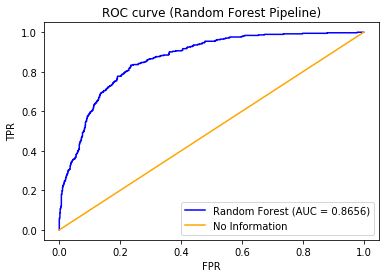

In [25]:
f = plt.figure()
fpr, tpr, _ = roc_curve(y_test, pred_prob[:,1])
plt.plot(fpr, tpr, color='blue', label='Random Forest (AUC = %0.4f)' % roc_score)
plt.plot([0,1],[0,1], color = 'orange', label = 'No Information')
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (Random Forest Pipeline)')
plt.show()

f.savefig("ROC_curve_RF_Pipe.pdf", bbox_inches='tight')

__Retrain on Full Dataset__

In [26]:
(X_pre, y_pre) = TelcoPreprocessing(X, y, X_only=False)

In [27]:
pipe2 = Pipeline([('SI', SimpleImputer), 
                 ('RF', RandForest)])

In [28]:
pipe2.set_params(SI__missing_values=np.nan, SI__strategy="median",
                RF__criterion="gini", RF__max_depth=9, RF__n_estimators=200)

Pipeline(memory=None,
     steps=[('SI', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [29]:
pipe2.fit(X_pre, y_pre)

C:\Users\rfowl\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
     steps=[('SI', SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)), ('RF', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

__Pickle Save__

In [30]:
def pickle_save(name, item):
    PIK = str(name)+ ".pickle"
    with open(PIK,"wb") as f:
        pickle.dump(item, f)

In [31]:
pickle_save('telco_pipeline', pipe2)